<a href="https://colab.research.google.com/github/CeloCruz/EDAs/blob/main/Startups_Success_Fail_(Data_Wrangling).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA
## Startup Success/Fail Dataset from Crunchbase

Here the objective is to analyze data in order to summarize its main characteristics, to better understand the data set, to discover relationships between different variables and to extract important variables for the problem we are trying to solve.

**Objective**<br>

The objective of the project is to predict whether a startup that is currently operating will become a success or a failure. The success of a company is defined as the event that provides the founders of the company with a large sum of money through the M&A (Merger and Acquisition) process or an IPO (Initial Public Offering). A company would be considered a failure if it had to close.

In this case I will not go as far as the modeling stage but I do plan to go through all the steps leading up to an EDA and get to `Data Preparation`.

I will have to answer the following questions:

* How many new companies fail?
* How many start-ups succeed?
* Reasons for failure
* How to avoid failure
* And many other questions...

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msno

## Load and Inspect the DataSet

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/big_startup_secsees_dataset.csv')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,/organization/-fame,#fame,http://livfame.com,Media,10000000,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878,operating,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   permalink          66368 non-null  object
 1   name               66367 non-null  object
 2   homepage_url       61310 non-null  object
 3   category_list      63220 non-null  object
 4   funding_total_usd  66368 non-null  object
 5   status             66368 non-null  object
 6   country_code       59410 non-null  object
 7   state_code         57821 non-null  object
 8   region             58338 non-null  object
 9   city               58340 non-null  object
 10  funding_rounds     66368 non-null  int64 
 11  founded_at         51147 non-null  object
 12  first_funding_at   66344 non-null  object
 13  last_funding_at    66368 non-null  object
dtypes: int64(1), object(13)
memory usage: 7.1+ MB


## Exploratory Data Analysis

### Handling with missing values
Let's visualize missing values

In [ ]:
df.isnull().sum()/df.count()*100

permalink             0.000000
name                  0.001507
homepage_url          8.249878
category_list         4.979437
funding_total_usd     0.000000
status                0.000000
country_code         11.711833
state_code           14.781827
region               13.764613
city                 13.760713
funding_rounds        0.000000
founded_at           29.759321
first_funding_at      0.036175
last_funding_at       0.000000
dtype: float64

<AxesSubplot:>

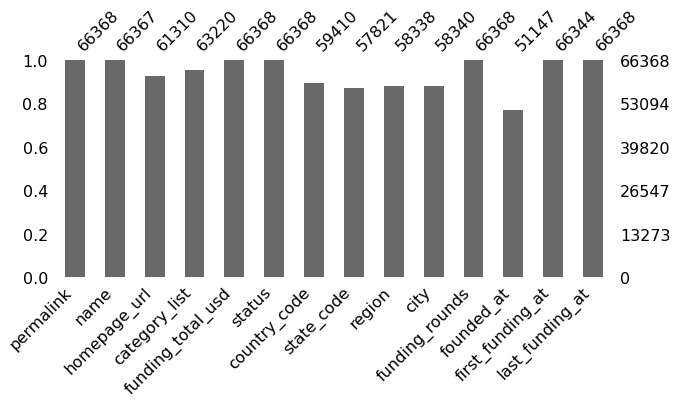

In [ ]:
msno.bar(df, figsize=(10,4))

See if we find a pattern in the missing values, such as a part of the dataset where values are missing for many columns at once.

<AxesSubplot:>

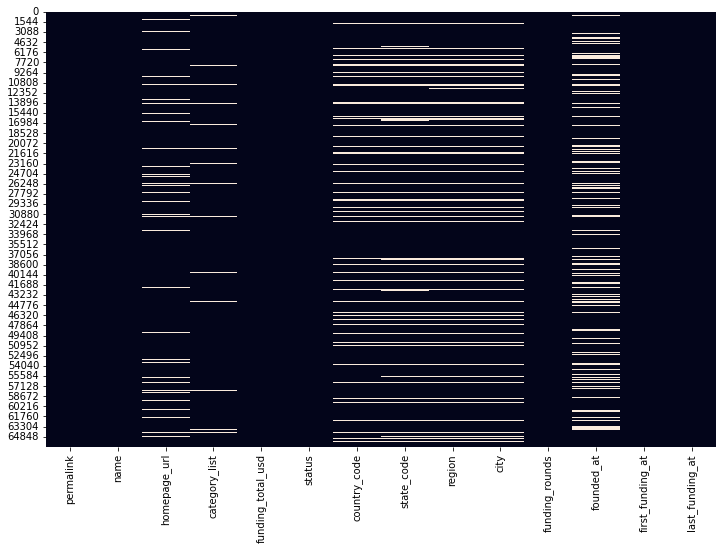

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(), cbar=False)

We can't distinguish a clear interval of rows with missing values, nor a clear relation, the only thing that we can appreciate is that almost all the rows with a missing value in the `country_code` column, also have missing values in state, region, and city.

We have almost 5% of missing data in the `category` column, we can fill it with "Other". 

For the columns related to location, we can see that when data is missing in one, data is almost always missing in the others, which makes sense because, if we don't have information about which country it is in, we probably don't know more specific data either. We are talking about having almost 90% of the data in the `country code` column, which is not bad. We could fill in the missing values using a Random Sample Imputation.

Finally, we have the column with the most missing data, having only about 70% of the data when it was founded. We could replace those values by `first_funding_at` or extract the years (which is what we are looking for), and apply a fill using Random Sample Imputation as well.

Text(0, 0.5, 'Number of startups')

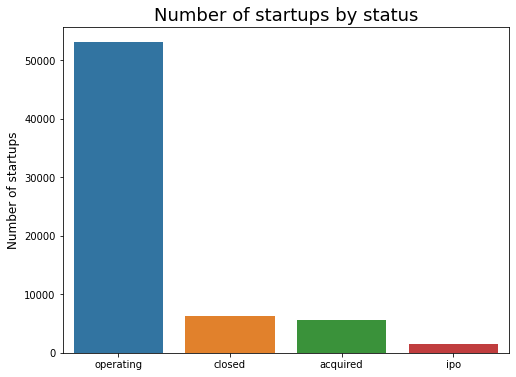

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x=df['status'].value_counts().index,y=df['status'].value_counts())
plt.title('Number of startups by status',size=18)
plt.ylabel('Number of startups',size=12)

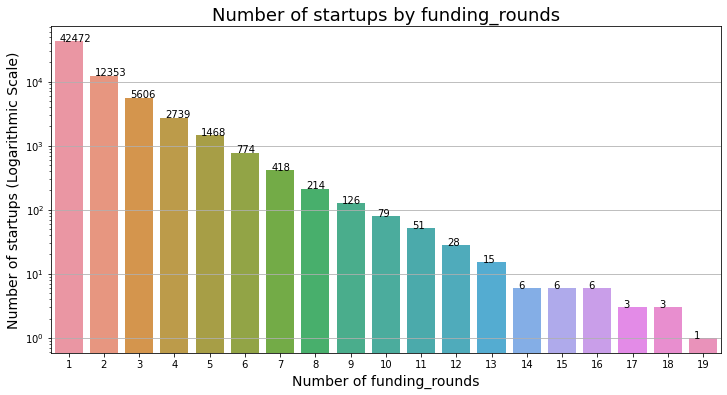

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x=df['funding_rounds'].value_counts().index, y=df['funding_rounds'].value_counts())
plt.title('Number of startups by funding_rounds',size=18)
plt.ylabel('Number of startups (Logarithmic Scale)',size=14)
plt.xlabel('Number of funding_rounds', size=14)
plt.grid(axis='y')
plt.yscale('log')

def addlabels(x,y):
    for i in x:
        plt.text(i-1.25,y[i],y[i])

addlabels(df['funding_rounds'].value_counts().index,df['funding_rounds'].value_counts())

All the startups had at least 1 founding round

In [ ]:
df['category_list'].value_counts()

Software                                                                       3995
Biotechnology                                                                  3615
E-Commerce                                                                     1332
Mobile                                                                         1177
Clean Technology                                                               1133
                                                                               ... 
Consumer Internet|Marketplaces|Mobile|Mobile Payments|Transportation|Travel       1
Apps|Mobile|Private Social Networking                                             1
Cloud Computing|Enterprise Software|Infrastructure|PaaS|Social Media              1
Content|SaaS|Social Media Marketing|Software                                      1
Consumer Goods|E-Commerce|Internet                                                1
Name: category_list, Length: 27296, dtype: int64

We have more than 27_000 differentes category types.

We can see that at the end there are categories with only one stratup, but this is mainly due to the fact that the company fits into multiple categories, having a combination of several of them. 

1. We could assume that the first category that appears refers to its main category.
2. Choose the subcategory that is present among the most frequent categories, as to have a more general view of the startups.

## Data Wrangling

### Transform `funding_total_usd` in float, and fill missing values

In [ ]:
def str_to_float(row):
    if '-' in row:
        row = np.nan
    else:
        row = float(row)
    return row
        
df['funding_total_usd'] = df['funding_total_usd'].apply(str_to_float)
df['funding_total_usd'].dtypes

dtype('float64')

In [ ]:
df['funding_total_usd'].isnull().sum()

12785

Here we see that we do in fact have missing values for the funding_total_usd column, only that they were previously filled with '-'.

Let's see the distribution of the `fundind_total_usd` column ignoring NaN values

In [ ]:
df['funding_total_usd'].aggregate([np.nanmean,np.nanmedian,np.nanstd])

nanmean      1.847860e+07
nanmedian    2.000000e+06
nanstd       1.880133e+08
Name: funding_total_usd, dtype: float64

Let's see the estimated location and the estimated variability of the `funding_total_usd` grouping by<br>
`funding_rounds`.

In [ ]:
funding_rounds_group = df.groupby('funding_rounds')['funding_total_usd'].aggregate(['count',np.nanmean,np.nanmedian,np.nanstd])
funding_rounds_group.head()

,count,nanmean,nanmedian,nanstd
funding_rounds,,,,
1,30789,1.007059e+07,896000.0,1.382065e+08
2,11477,1.404059e+07,2870000.0,9.023609e+07
3,5447,2.289590e+07,7500000.0,8.833278e+07
4,2697,3.400935e+07,14650000.0,7.141552e+07
5,1456,7.170403e+07,25322724.5,7.926982e+08


Let's fill missing values in the column `funding_total_usd` with the mean calculated above.
Depending on the number of funding rounds would be the mean assigned.

In [ ]:
funding_filled = []

for h,i in enumerate(df['funding_total_usd']):
    if np.isnan(i):
        i = int(funding_rounds_group.loc[df['funding_rounds'].iloc[h],'nanmean'])
        funding_filled.append(i)
    else:
        funding_filled.append(int(i))
    
df['funding_filled'] = funding_filled
df['funding_filled'].isnull().sum()

0

### One Hot Encoding and classify by `status` class

Let's create a column that classifies startups depending on whether they succeeded, failed or are still operating.<br>
As well as apply *One Hot Encoding* to transform categorical variables in number values

In [ ]:
status = []

for i in df['status']:
    if i in ['acquired','ipo']:
        status.append('success')
    elif i == 'closed':
        status.append('fail')
    else:
        status.append('operating')
        
df['status_class'] = status

In [ ]:
status_class = pd.get_dummies(df['status_class'])
df = pd.concat([df,status_class],axis=1)
df.head()

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,country,funding_filled,status_class,fail,operating,success
0,/organization/-fame,#fame,http://livfame.com,Media,10000000.0,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05,IND,10000000,operating,0,1,0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000.0,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14,USA,700000,operating,0,1,0
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878.0,operating,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30,CAN,3406878,operating,0,1,0
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000.0,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19,CHN,2000000,operating,0,1,0
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,NaN,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24,USA,10070591,operating,0,1,0


We have a lot of missing values in `country_code` column as well as in `founded_at` column, so dropping those rows it's not an option, due to would be the big amount of data that we'll lose.

### Filling `country code` column with *Random Sample Imputation*

We could fill in the missing values with the numpy random choice method (except for the null values), choosing according to their probability of being chosen.

The more startups are created in that country, the more likely it is that the missing value corresponds to that country.

In [ ]:
# Let's see the status of startups depending on the country
country = []

for i in df.country_code:
  if not isinstance(i,str):
    country.append(np.random.choice(df.country_code[df.country_code.notnull()]))
  else:
    country.append(i)

df['country'] = country

In [ ]:
# Original column
country_code_column = pd.DataFrame()
country_code_column['count'] = df.country_code.value_counts()
country_code_column['count/Total'] = df.country_code.value_counts()/df.country_code.count()
country_code_column['fail'] = df.groupby('country_code')['fail'].sum()/df.country_code.value_counts()
country_code_column['success'] = df.groupby('country_code')['success'].sum()/df.country_code.value_counts()
country_code_column = country_code_column[:10]

# Our column
country_column = pd.DataFrame()
country_column['count'] = df.country.value_counts()
country_column['count/Total'] = df.country.value_counts()/df.country.count()
country_column['fail'] = df.groupby('country')['fail'].sum()/df.country.value_counts()
country_column['success'] = df.groupby('country')['success'].sum()/df.country.value_counts()
country_column = country_column[:10]

# Let's see de difference between both columns
country_column - country_code_column

,count,count/Total,fail,success
USA,4392,-0.000177,0.016894,-0.009501
GBR,398,-0.000511,0.018765,-0.000477
CAN,238,0.000189,0.015472,-0.008924
IND,183,-0.000059,0.018599,0.000630
CHN,185,0.000063,0.019718,-0.004430
FRA,124,-0.000135,0.023875,-0.004633
DEU,142,0.000230,0.021156,-0.009517
ISR,109,-0.000061,0.012386,-0.010669
ESP,94,0.000100,0.021062,0.000552
AUS,56,-0.000044,0.023238,-0.002201


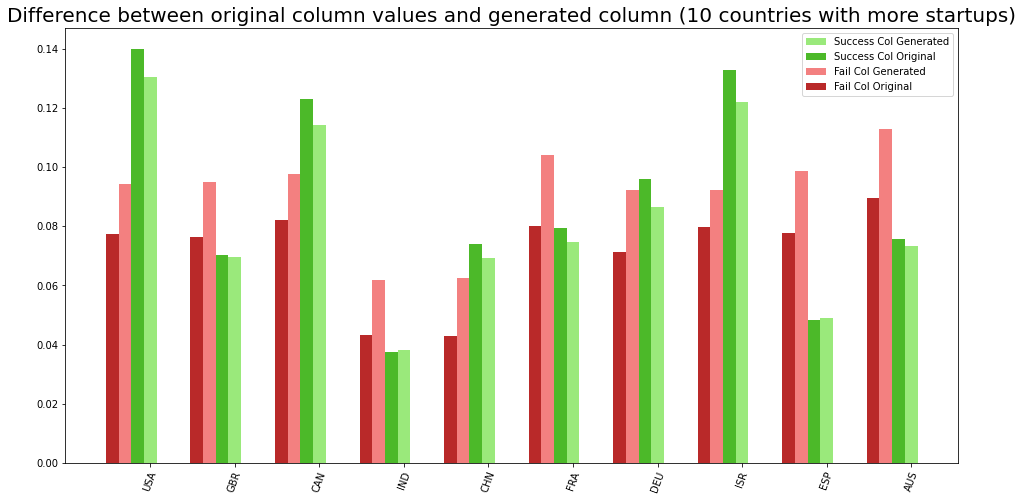

In [ ]:
# Differences between both columns

n = len(country_column.index)
x = np.arange(n)
width = .15

plt.figure(figsize=(16,8))
plt.bar(x,country_column.success, width=width, label='Success Col Generated', color='#9AE97B' )
plt.bar(x - width,country_code_column.success, width=width, label='Success Col Original', color='#4CB929')
plt.bar(x - 2*width,country_column.fail, width=width, label='Fail Col Generated', color='#F38080')
plt.bar(x - 3*width,country_code_column.fail, width=width, label='Fail Col Original', color='#B92929')
plt.title('Difference between original column values and generated column (10 countries with more startups)', size=20)
plt.xticks(x,country_column.index,rotation=70)
plt.legend()
plt.show()

It seems reasonable, there's no a big difference of proportion regarding to the entire dataset.

### Random Sample Imputation with `founded_at` column.

For missing values in the foundation date we will replace those values by the date of the first funding, and for those cases where we do not have either of the two values (24 inputs) we will fill them by doing a random sample imputation.

In [ ]:
years = []

for fou, first in zip(df.founded_at, df.first_funding_at):
  if isinstance(fou,str):
    years.append(int(fou.split('-')[0]))
  elif not isinstance(fou,str) and isinstance(first,str):
    years.append(int(first.split('-')[0]))
  else:
    date = int(np.random.choice(df.founded_at[df.founded_at.notnull()]).split('-')[0])
    years.append(date)

df['year'] = years
df[df.founded_at.isnull()].head()

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,...,founded_at,first_funding_at,last_funding_at,funding_filled,status_class,fail,operating,success,country,year
0,/organization/-fame,#fame,http://livfame.com,Media,10000000.0,operating,IND,16,Mumbai,Mumbai,...,NaN,2015-01-05,2015-01-05,10000000,operating,0,1,0,IND,2015
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878.0,operating,NaN,NaN,NaN,NaN,...,NaN,2014-01-30,2014-01-30,3406878,operating,0,1,0,USA,2014
5,/organization/01games-technology,01Games Technology,http://www.01games.hk/,Games,41250.0,operating,HKG,NaN,Hong Kong,Hong Kong,...,NaN,2014-07-01,2014-07-01,41250,operating,0,1,0,HKG,2014
10,/organization/1-4-all,1-4 All,NaN,Entertainment|Games|Software,NaN,operating,USA,NC,NC - Other,Connellys Springs,...,NaN,2013-04-21,2013-04-21,10070591,operating,0,1,0,USA,2013
28,/organization/100du-tv,100du.tv,http://www.100du.com,Hospitality,3000000.0,operating,CHN,23,Shanghai,Shanghai,...,NaN,2008-01-07,2010-08-13,3000000,operating,0,1,0,CHN,2008


### Simplify the `category_list` column

Let's create a column named main category, we're going to assume that the first description in<br>
the `category_list` refers to the main category

In [ ]:
main_category = []

for i in df['category_list']:
    if not isinstance(i,str):
      main_category.append('Other')
    else:
      main_category.append(i.split('|')[0])

df['main_category'] = main_category
df.head()

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,...,first_funding_at,last_funding_at,funding_filled,status_class,fail,operating,success,country,year,main_category
0,/organization/-fame,#fame,http://livfame.com,Media,10000000.0,operating,IND,16,Mumbai,Mumbai,...,2015-01-05,2015-01-05,10000000,operating,0,1,0,IND,2015,Media
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000.0,operating,USA,DE,DE - Other,Delaware City,...,2014-03-01,2014-10-14,700000,operating,0,1,0,USA,2014,Application Platforms
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878.0,operating,NaN,NaN,NaN,NaN,...,2014-01-30,2014-01-30,3406878,operating,0,1,0,USA,2014,Apps
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000.0,operating,CHN,22,Beijing,Beijing,...,2008-03-19,2008-03-19,2000000,operating,0,1,0,CHN,2007,Curated Web
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,NaN,operating,USA,IL,"Springfield, Illinois",Champaign,...,2014-07-24,2014-07-24,10070591,operating,0,1,0,USA,2010,Software


### Drop the columns that we don't need for the analysis

In [ ]:
startups = df[['name','country','year','city','main_category','funding_rounds','funding_filled',
               'first_funding_at','last_funding_at','status','status_class','fail','operating','success']]
startups.head()

,name,country,year,city,main_category,funding_rounds,funding_filled,first_funding_at,last_funding_at,status,status_class,fail,operating,success
0,#fame,IND,2015,Mumbai,Media,1,10000000,2015-01-05,2015-01-05,operating,operating,0,1,0
1,:Qounter,USA,2014,Delaware City,Application Platforms,2,700000,2014-03-01,2014-10-14,operating,operating,0,1,0
2,"(THE) ONE of THEM,Inc.",USA,2014,NaN,Apps,1,3406878,2014-01-30,2014-01-30,operating,operating,0,1,0
3,0-6.com,CHN,2007,Beijing,Curated Web,1,2000000,2008-03-19,2008-03-19,operating,operating,0,1,0
4,004 Technologies,USA,2010,Champaign,Software,1,10070591,2014-07-24,2014-07-24,operating,operating,0,1,0


<AxesSubplot:>

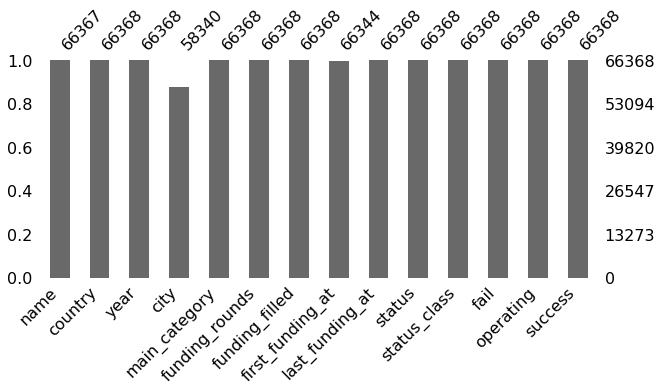

In [ ]:
msno.bar(startups,figsize=(10,4))

We have the final dataframe above, with all the fields that we are interesed, now let's export it to a CSV file.

In [ ]:
startups.to_csv('startups_clean_2.csv',index=False)